# Database and Cloud - Example Jupyter Notebook

The code below installs plotly and numpy so you can use these libraries later on...

In [15]:
!pip install plotly
!pip install numpy

Each cell in the notebook allows us to write python code, execute it and see the results


In [2]:
print("Hello, world")

Hello, world


Below is the code from the masterclass video.  In this code we import the sqlite3 libray, create a connection to a database (which is in memory i.e. not saved), create the Movies and MovieTheatres tables, insert some data and finally execture a query to display all movies alongside their ratings

For more information on the mysqlite3 library see - https://docs.python.org/3/library/sqlite3.html 


In [32]:
import sqlite3

db = sqlite3.connect(':memory:')
cursor = db.cursor()

query = '''DROP TABLE IF EXISTS  Movies'''
cursor.execute(query)
query = '''DROP TABLE IF EXISTS  MovieTheaters'''
cursor.execute(query)

query = '''CREATE TABLE Movies (
   Code INTEGER PRIMARY KEY NOT NULL,
   Title TEXT NOT NULL,
   Rating TEXT 
 );'''
cursor.execute(query)

query = ''' CREATE TABLE MovieTheaters (
   Code INTEGER PRIMARY KEY NOT NULL,
   Name TEXT NOT NULL,
   Movie INTEGER  
     CONSTRAINT fk_Movies_Code REFERENCES Movies(Code)
 );'''
cursor.execute(query)

cursor.execute('''INSERT INTO Movies(Code,Title,Rating) VALUES(9,'Citizen King','G')''')
cursor.execute('''INSERT INTO Movies(Code,Title,Rating) VALUES(1,'Citizen Kane','PG')''')
cursor.execute('''INSERT INTO Movies(Code,Title,Rating) VALUES(2,'Singin'' in the Rain','G')''')
cursor.execute('''INSERT INTO Movies(Code,Title,Rating) VALUES(3,'The Wizard of Oz','G')''')
cursor.execute('''INSERT INTO Movies(Code,Title,Rating) VALUES(4,'The Quiet Man',NULL)''')
cursor.execute('''INSERT INTO Movies(Code,Title,Rating) VALUES(5,'North by Northwest',NULL)''')
cursor.execute('''INSERT INTO Movies(Code,Title,Rating) VALUES(6,'The Last Tango in Paris','NC-17')''')
cursor.execute('''INSERT INTO Movies(Code,Title,Rating) VALUES(7,'Some Like it Hot','PG-13')''')
cursor.execute('''INSERT INTO Movies(Code,Title,Rating) VALUES(8,'A Night at the Opera',NULL)''')
cursor.execute('''INSERT INTO MovieTheaters(Code,Name,Movie) VALUES(1,'Odeon',5)''')
cursor.execute('''INSERT INTO MovieTheaters(Code,Name,Movie) VALUES(2,'Imperial',1)''')
cursor.execute('''INSERT INTO MovieTheaters(Code,Name,Movie) VALUES(3,'Majestic',NULL)''')
cursor.execute('''INSERT INTO MovieTheaters(Code,Name,Movie) VALUES(4,'Royale',6)''')
cursor.execute('''INSERT INTO MovieTheaters(Code,Name,Movie) VALUES(5,'Paraiso',3)''')
cursor.execute('''INSERT INTO MovieTheaters(Code,Name,Movie) VALUES(6,'Nickelodeon',NULL)''')

query = '''SELECT Title, Rating FROM Movies'''
cursor.execute(query)
all_rows = cursor.fetchall()
for row in all_rows:
  print(row[0], " : ", row[1])

Citizen Kane  :  PG
Singin' in the Rain  :  G
The Wizard of Oz  :  G
The Quiet Man  :  None
North by Northwest  :  None
The Last Tango in Paris  :  NC-17
Some Like it Hot  :  PG-13
A Night at the Opera  :  None
Citizen King  :  G


The code below imports the numpy and matplotlib libraries and gives them a specific name we can refer to them as.  There is also the 'magic line' %matplotlib notebook which enables the visualisations produced to be displayed in the notebook.

Documentation for the numpy and matplotlib can be found here

https://numpy.org/devdocs/user/quickstart.html
https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html#


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

The code below shows a simple example of a bar chart being generated from some example data


<IPython.core.display.Javascript object>


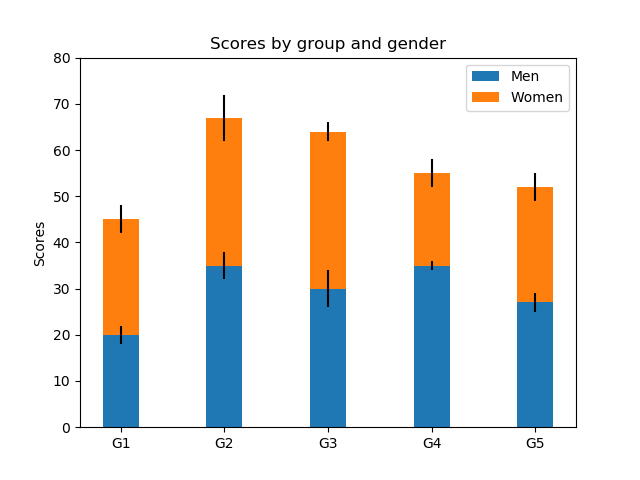

In [24]:
N = 5

# data to be plotted
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

# code to create a bar plot from the data above 
p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

# display the resulting bar chart 
plt.show()

<IPython.core.display.Javascript object>


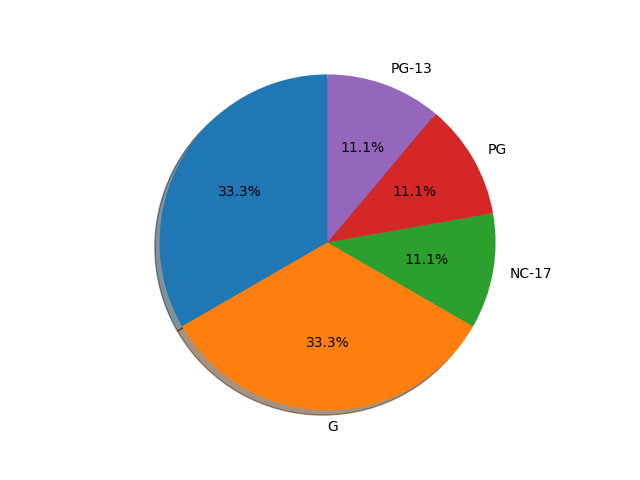

In [48]:
# Pie chart for the number of different movie ratings

# query the database
query = '''SELECT COUNT(*), Rating FROM Movies GROUP BY Rating'''
cursor.execute(query)
all_rows = cursor.fetchall()

# process the data returned
labels = []
sizes = []
count = 0
i = 0
for row in all_rows:
    count += int(row[0])
    sizes.append(row[0])
    labels.append(row[1])

# plot the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()